# Code for an one-neuron neural network

## Imports and setup

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0) # for reproducibility

## Define a basic Neuron class

![Schema of a basic neuron](./neuron_schema.png)

In [2]:
class Neuron:
	"""
	Defines a simple neuron for a neural network.
	
	Syntax:
	--
	>>> testNeuron = Neuron(<number of Inputs>, <actFunc>) # Creating the neuron
	>>> output = testNeuron(<input array>) # Calculating the output

	Example:
	--
	>>> neuron_one = Neuron(3, "sigmoid") # Creating the neuron
	>>> output = neuron_one([0., 1., 1.]) # Calculating the output
	"""
	def __init__(self, numberOfInputs, actFunc = "sigmoid"):
		"""
		Initializes a new neuron with numberOfInputs random weights and a bias between -1 and 1,\n
		and assigning the activation function.
		"""
		# generate random weigts
		self.weights = 2 * np.random.random(numberOfInputs) - 1
		self.bias = 2 * np.random.random() - 1
		# select the activation function
		if type(actFunc) == str:
			if actFunc == "sigmoid":
				self.activation_func = lambda z: 1 / (1 + np.exp(-z))
				self.gradActivation_func = lambda z: self.activation_func(z) * (1 - self.activation_func(z))
			elif actFunc == "hyperbolicTagent":
				self.activation_func = lambda z: (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
				self.gradActivation_func = lambda z: 1 - self.activation_func(z)**2
			elif actFunc == "relu":
				self.activation_func = lambda z: np.maximum(0, z)
				self.gradActivation_func = lambda z: np.heaviside(z,0)
		elif callable(actFunc):
			self.activation_func = actFunc
		else:
			raise Exception("No valid activation function given.")
	
	def __call__(self, input):
		if np.size(input, axis=1) == self.weights.size:
			return self.activation_func(self.bias + np.dot(self.weights, input.T))
		else:
			raise Exception("Input is not in the right size.")

## Define the loss function

In [3]:
def mean_squared_error_loss(real_output, predicted_output):
	if real_output.size != predicted_output.size:
		raise Exception("Array sizes are not matching.")
	return 1 / real_output.size * np.sum((real_output - predicted_output)**2)

## Define the gradient function, which is calculated by hand and hard-coded

In [4]:
def singleNeuronGradientMeanSquaredErrorLoss(numberOfInputs, input, real_output, predicted_output, neuron):
	"""
	Hand calculated gradient of the mean squared error loss
	"""
	n = real_output.size
	input = np.array(input)
	grad = np.zeros(numberOfInputs + 1) # + 1 for the gradient
	# weights gradient
	for j in range(numberOfInputs):
		sum = 0
		for i in range(n):
			sum += (real_output[i] - predicted_output[i]) * neuron.gradActivation_func(np.dot(neuron.weights, input[i,:])) * input[i,j]
		grad[j] = -2 / n * sum
	# bias gradient
	for i in range(n):
		sum += (real_output[i] - predicted_output[i]) * neuron.gradActivation_func(np.dot(neuron.weights, input[i,:]))
		grad[-1] = -2 / n * sum
	return grad

## Neural Network

Now we have everything we need.

We construct a neural network with one neuron and train and test it with the following simple example.

Training data

| $x_1$ | $x_2$ | $x_3$ | $y$ |
| ----------- | ----------- | ----------- | ----------- |
| 0 | 0 | 1 | 0 |
| 0 | 1 | 1 | 0 |
| 1 | 0 | 1 | 1 |
| 1 | 1 | 1 | 1 |

Testing data

| $x_1$ | $x_2$ | $x_3$ | $y$ |
| ----------- | ----------- | ----------- | ----------- |
| 1 | 0 | 0 | 1 |
| 0 | 1 | 0 | 0 |

As you can see, the pattern is $y = x_1$.

Result:  [0.86698211 0.13432124]
Weights:  [ 3.63046527 -0.10734909 -0.71732171]
Bias:  -1.755930556145024
Smallest loss index: 9999 , value: 0.03385611140584965


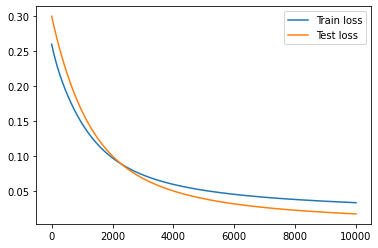

In [5]:
numberOfTrainingIterations = 10000

train_input = np.array([[0, 0, 1], 
						[1, 1, 1], 
						[1, 0, 1], 
						[0, 1, 1]])
train_output = np.array([0, 1, 1, 0])

test_input = np.array([[1, 0, 0],
					   [0, 1, 0]])
test_output = np.array([1, 0])

learing_rate = .01

neuron = Neuron(3, actFunc="sigmoid")
lossTrain = np.zeros(numberOfTrainingIterations)
lossTest = np.zeros(numberOfTrainingIterations)

for index in range(numberOfTrainingIterations):
	pred_output = neuron(train_input)
	lossTrain[index] = mean_squared_error_loss(train_output, pred_output)
	lossTest[index] = mean_squared_error_loss(test_output, neuron(test_input))
	grad = singleNeuronGradientMeanSquaredErrorLoss(3, train_input, train_output, pred_output, neuron)
	neuron.weights -= learing_rate * grad[0:-1]
	neuron.bias -= learing_rate * grad[-1]

print("Result: ", neuron(test_input))
print("Weights: ", neuron.weights)
print("Bias: ", neuron.bias)
minIndex = np.argmin(lossTrain)
print("Smallest loss index:", minIndex, ", value:", lossTrain[minIndex])


fig = plt.figure()
plt.plot(range(numberOfTrainingIterations), lossTrain, label = "Train loss")
plt.plot(range(numberOfTrainingIterations), lossTest, label = "Test loss")
plt.legend()
plt.show()